In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Excercise 1. Neural Network

In [2]:
training_data = np.array(pd.read_csv('zip.train', sep=' ', header=None))
test_data = np.array(pd.read_csv('zip.test', sep =' ',header=None))

x_train, y_train = training_data[:,1:-1], training_data[:,0]
x_test, y_test = test_data[:,1:], test_data[:,0]

In [3]:
def labels_to_one_hot(labels):
    onehot_encoded = []
    for label in labels:
        vector = np.zeros(10)
        vector[int(label)] = 1
        onehot_encoded.append(vector)
    return np.array(onehot_encoded)

In [4]:
y_vec = labels_to_one_hot(y_train)

In [72]:
class NeuralNetwork:
    def __init__(self, x, y, n_hidden, learning_rate=0.1):
        self.x = x
        self.y = y
        self.n_input = x.shape[1]
        self.n_hidden = n_hidden
        self.n_output = y.shape[1]
        self.lr = learning_rate
        self.__initialize_weights()
        self.loss = []
        
    def __initialize_weights(self):
        self.w1 = np.random.rand(self.n_input, self.n_hidden)
        self.b1 = np.zeros((1, self.n_hidden))
        
        self.w2 =  np.random.rand(self.n_hidden, self.n_output) 
        self.b2 = np.zeros((1, self.n_output))
        
    def __sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def __sigmoid_deriv(self, s):
        return self.__sigmoid(s) * (1 - self.__sigmoid(s))
    
    def __feedforward(self):
        self.a1 = self.__sigmoid(np.dot(self.x, self.w1)) + self.b1
        self.a2 = self.__sigmoid(np.dot(self.a1, self.w2)) + self.b2 
        return self.a2
    
    def __backprop(self, output):
        error = np.mean((output - self.y)** 2)
        self.loss.append(error)
        print('loss:', error)
        
        d_w2 = np.dot(self.a1.T, (2*(self.y - output) * self.__sigmoid_deriv(output)))
        d_w1 = np.dot(self.x.T, (np.dot(2*(self.y - output) * self.__sigmoid_deriv(output), self.w2.T) * self.__sigmoid_deriv(self.a1)))

        self.w1 += d_w1
        self.w2 += d_w2
    
    def train(self, epochs):
        for i in range(epochs):
            output = self.__feedforward()
            self.__backprop(output)
        
        plt.plot(self.loss)
        
    
    def predict(self):
        pass

In [73]:
neural_net = NeuralNetwork(x_train, y_vec, 10)

loss: 0.2586123097119559
loss: 0.24995702698113265
loss: 0.09999999999980691
loss: 0.9
loss: 0.25
loss: 0.1
loss: 0.1
loss: 0.1
loss: 0.1
loss: 0.2396790563708682
loss: 0.1
loss: 0.2247359758606501
loss: 0.1
loss: 0.2617336442189
loss: 0.4959539157865862


/Users/evabertalan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


loss: 0.2501577287066246
loss: 0.2698806748045536
loss: 0.17243176518996023
loss: 0.10002057330955973
loss: 0.1
loss: 0.16724729118090798
loss: 0.245638458373337
loss: 0.1
loss: 0.17994788094911535
loss: 0.3361061582773282
loss: 0.3466328350020573
loss: 0.2499657111507338
loss: 0.16724729118090798
loss: 0.1
loss: 0.2698806748045536
loss: 0.1
loss: 0.17243176518996023
loss: 0.22721848854752436
loss: 0.16724729118090798
loss: 0.17994788094911535
loss: 0.26373611301604716
loss: 0.2540940886023865
loss: 0.34675627485941574
loss: 0.10002057330955973
loss: 0.2396790563708682
loss: 0.12762995473871896
loss: 0.1559594020024688
loss: 0.10220820189274447
loss: 0.2811342751337251
loss: 0.11220683033877384
loss: 0.23936362630651864
loss: 0.08974077629954738
loss: 0.2478878068821512
loss: 0.21066355318901284
loss: 0.19699447015475252
loss: 0.09053627760252365
loss: 0.2195610023805058
loss: 0.2184799021867565
loss: 0.2493688237781586
loss: 0.09713345220134412
loss: 0.17733181417101712
loss: 0.246148

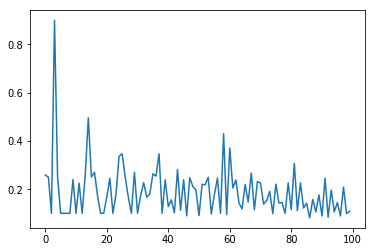

In [74]:
neural_net.train(100)